In [7]:
!pip install s1290242_learn

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip show s1290242_learn

Name: s1290242-learn
Version: 2023.8.2.1
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/udayLab/PAMI
Author: TatsuyaTsuji
Author-email: s1290242@u-aizu.ac.jp
License: MIT
Location: /home/tatsuya/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pami, pandas, Pillow, plotly, psutil, resource, urllib3, validators
Required-by: 


In [25]:
import statistics

In [26]:
inputFile = 'PM24HeavyPollutionRecordingSensors.csv'
minSup = 10
sep = '\t'

itemsFrequency = frequencyOfItems(inputFile, minSup, sep)
itemsFreqDictionary = itemsFrequency.getFrequency()

print(itemsFreqDictionary)


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
['Point(130.9337317 34.1711271)']:10 
Point(139.7098858 35.5963547),Point(130.02421 32.8426277):10 
['Point(129.846458 32.827976)']:10 
['Point(136.9755257 35.1755997)']:10 
['Point(139.7679463 35.692767)']:10 
['Point(136.6419677 35.0087051)']:10 
['Point(139.9765615 36.3096848)']:10 
Point(139.9717795 35.8439578),Point(136.1929755 34.079752):10 
['Point(141.0219079 43.1816823)']:10 
['Point(140.0495324 35.9110671)']:10 
['Point(130.5175494 31.5211345)']:10 
['Point(129.7311166 33.1592435)']:10 
['Point(131.9528553 33.9627921)']:10 
['Point(134.5430334 34.1183872)']:10 
['Point(140.1153436 35.5103903)']:10 
['Point(139.7266446 35.9148962)']:10 
['Point(131.5627639 34.0517195)']:10 
['Point(136.5528094 34.87787540000001)']:10 
['Point(125.2876685 24.8032189)']:10 
['Point(132.9441308 33.3907069)']:10 
['Point(130.2020495 31.7590927)']:10 
['Point(135.4010579 34.7842699)']:10 
['Point(132.1015946 33.9638

In [42]:
import sys
sys.path.append("/home/tatsuya/Exercise_14/s1290242_learn/")

In [44]:
from s1290242_learn.visualization import heatMapItemsFrequency


heatmap_frequency = heatMapItemsFrequency.heatMapItemsFrequency('frequentPatterns.txt')


m = heatmap_frequency.create_heat_map()


m.save('heatmap.html')


### Continue from the knowledge discovery step of Exercise-13. That is,  (You can copy-paste the code. No problem)

In [47]:
from PAMI.frequentPattern.basic import FPGrowth as alg

inputFile = 'PM24HeavyPollutionRecordingSensors.csv'
minSup = 0
obj = alg.FPGrowth(inputFile, minSup)
obj.startMine()
obj.save('frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


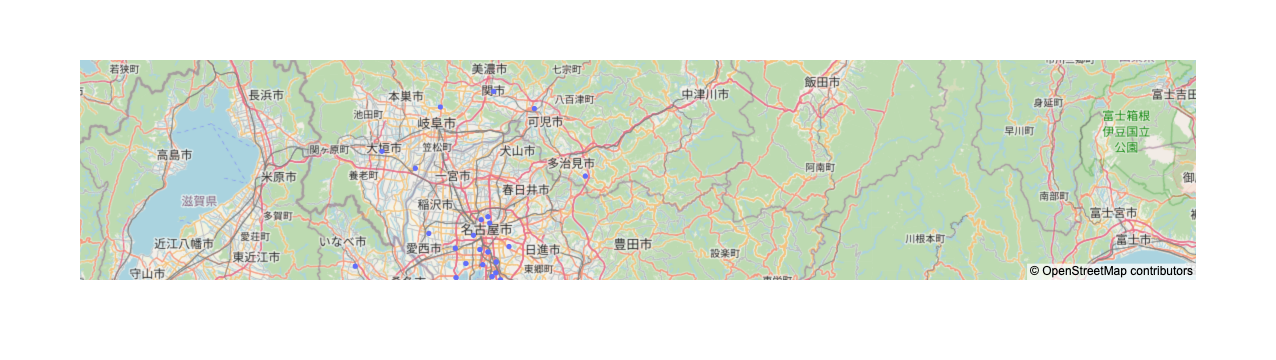

In [49]:
import re
import plotly.express as px
import pandas as pd

# Load patterns from the file
def load_patterns(filename):
    with open(filename, 'r') as f:
        return f.readlines()

# Find the longest pattern
def get_longest_pattern(pattern_list):
    longest_coords = []
    longest_length = 0
    for pattern in pattern_list:
        # Extract coordinates from the pattern
        coords = re.findall(r'Point\((.*?)\)', pattern)
        if len(coords) > longest_length:
            longest_coords = coords
            longest_length = len(coords)
    return longest_coords

# Convert to dataframe and plot
def plot_on_map(coords_list):
    data = pd.DataFrame(coords_list, columns=['coord_pair'])
    data[['Longitude', 'Latitude']] = data['coord_pair'].str.split(' ', expand=True)
    data['Longitude'] = data['Longitude'].astype(float)
    data['Latitude'] = data['Latitude'].astype(float)

    mapping = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', hover_name='coord_pair')
    mapping.update_layout(mapbox_style='open-street-map')
    mapping.show()

if __name__ == "__main__":
    pattern_data = load_patterns('frequentPatterns.txt')
    longest_coordinates = get_longest_pattern(pattern_data)
    plot_on_map(longest_coordinates)
